In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [8]:
df = pd.read_csv('house_prices.csv')

X = df[['size_sqft', 'bedrooms', 'bathrooms', 'age', 'distance_city_center_km']]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = list(range(1, 26, 2))
cv_rmse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    cv_rmse.append(rmse)

best_k = k_values[np.argmin(cv_rmse)]
print(f"Best k: {best_k}, CV RMSE: {min(cv_rmse):.2f}")

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}")




Best k: 5, CV RMSE: 266899.18
Test RMSE: 321899.27, Test R²: -0.31


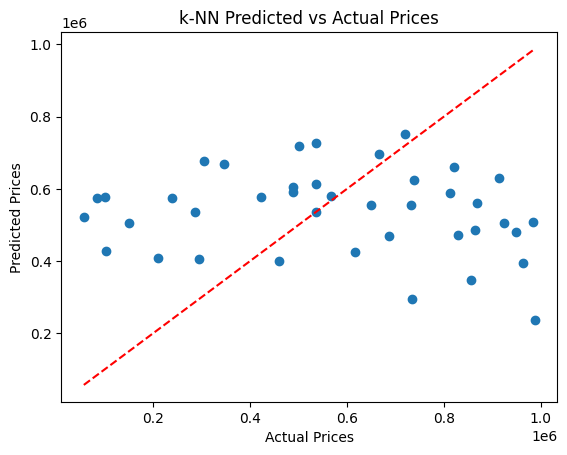

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("k-NN Predicted vs Actual Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()